##### Copyright 2020 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Copyright 2020 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/hub/tutorials/tf2_object_detection"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/tf2_object_detection.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/tf2_object_detection.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/hub/tutorials/tf2_object_detection.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
  <td><a href="https://tfhub.dev/tensorflow/collections/object_detection/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub 모델 보기</a></td>
</table>

# TensorFlow Hub 객체 감지 Colab

TensorFlow Hub 객체 감지 Colab에 오신 것을 환영합니다! 이 노트북에서는 이미지에서 "즉시 사용 가능한" 객체 감지 모델을 실행하는 단계를 안내합니다.

### 더 많은 모델

[이](https://tfhub.dev/tensorflow/collections/object_detection/1) 컬렉션에는 COCO 2017 데이터세트에서 훈련된 TF 2 객체 감지 모델이 포함되어 있습니다. 현재, [tfhub.dev](https://tfhub.dev/s?module-type=image-object-detection)에서 호스팅되는 모든 객체 감지 모델은 [여기](https://tfhub.dev/)에서 찾을 수 있습니다.

## 가져오기 및 설정

기본 가져오기부터 시작하겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/google_drive')

In [ ]:
!nvidia-smi

In [ ]:
# This Colab requires TF 2.5.
!pip install -U "tensorflow>=2.5"

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
# import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
import re
from shutil import copyfile
import argparse
import math
import random

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

## 유틸리티



## 시각화 도구

적절하게 감지된 상자, 키포인트 및 세분화로 이미지를 시각화하기 위해 TensorFlow Object Detection API를 사용합니다. 설치를 위해 리포지토리를 복제합니다.

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3529, done.
remote: Counting objects: 100% (3529/3529), done.
remote: Compressing objects: 100% (2942/2942), done.
remote: Total 3529 (delta 931), reused 1524 (delta 533), pack-reused 0
Receiving objects: 100% (3529/3529), 47.00 MiB | 31.23 MiB/s, done.
Resolving deltas: 100% (931/931), done.


Object Detection API 설치하기

Installation of the Object Detection API is achieved by installing the object_detection package. This is done by running the following commands from within Tensorflow\models\research:

In [ ]:
# %%bash
# sudo apt install -y protobuf-compiler
# cd models/research/
# protoc object_detection/protos/*.proto --python_out=.
# cp object_detection/packages/tf2/setup.py .
# python -m pip install .


In [ ]:
!sudo apt install -y protobuf-compiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
%cd /content/models/research/


/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 34.90 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd /content/cocoapi/PythonAPI

/content/cocoapi/PythonAPI


In [ ]:
!make

In [ ]:
!pwd

In [ ]:
!ls -al

In [ ]:
!cp -r pycocotools /content/models/research/

In [ ]:
%cd /content

In [ ]:
%cd /content/models/research/

In [ ]:
!ls -al

In [ ]:
!cp object_detection/packages/tf2/setup.py .


In [ ]:
!pwd

/content/models/research


In [ ]:
!ls -al

In [ ]:
!python -m pip install .

## Tensorflow Object Detection API 설치 확인

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

In [ ]:
!pwd

/content/models/research


In [ ]:
%cd /content

/content


In [ ]:
!pwd

/content


In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [ ]:
train_dir = "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/train"
test_dir = "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test"

In [ ]:
# !ls -l | grep ^- | wc -l

In [ ]:
PATH_TO_IMAGES_FOLDER="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images"
PATH_TO_ANNOTATIONS_FOLDER="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/annotations"

In [ ]:
!mkdir "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4"

## pipeline.confg
Tensorflow object detection Model Zoo에서 다운로드한 Pre-trained Model의 디렉토리에 있는 pipeline.config을 수정하여 Transfer Learning을 수행한다.

In [ ]:
# !cp "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/pipeline.config" \
# "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v2"

In [ ]:
!cp "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v3/pipeline.config" \
"/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4"

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v1"

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4" \
--pipeline_config_path="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4/pipeline.config" \
--alsologtostderr

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4" \
--pipeline_config_path="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4/pipeline.config" \
--checkpoint_dir="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4" \

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir="/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v2"

# fine_tune_checktype: detection

The only parts of the full detection model that are not restored are the box and class prediction heads. This option is typically used when you want to use a pre-trained detection model and train on a new dataset or task which requires different box and class prediction heads.

## save model!!!

In [ ]:
!mkdir "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/exported-models/my_faster_rcnn_resnet50_v3"

In [ ]:
PATH_TO_MODEL_DIR = "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/exported-models/my_faster_rcnn_resnet50_v3"
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print(PATH_TO_SAVED_MODEL)

/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/exported-models/my_faster_rcnn_resnet50_v3/saved_model


In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4/pipeline.config" \
--trained_checkpoint_dir "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v4" \
--output_directory "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/exported-models/my_faster_rcnn_resnet50_v3"

In [ ]:
!ps -l

In [ ]:
!kill 788

In [ ]:
from tensorflow.core.util import event_pb2
from pathlib import Path

In [ ]:
train_metrics = [
    "Loss/BoxClassifierLoss/localization_loss",
    "Loss/RPNLoss/localization_loss",
    "Loss/RPNLoss/objectness_loss",
    "Loss/regularization_loss",
    "Loss/total_loss",
    "learning_rate",
]

In [ ]:
event_files = [str(f) for f in Path('/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v1/train').rglob('events.out.*')]

In [ ]:
print(event_files)

['/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v1/train/events.out.tfevents.1668133456.d9f17c322636.2819.0.v2', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/models/my_faster_rcnn_resnet50_v1/train/events.out.tfevents.1668133586.d9f17c322636.2928.0.v2']


In [ ]:
len(event_files)

2

In [ ]:
# for event_file in event_files:
#     serialized_examples = tf.data.TFRecordDataset(event_file)
#     # print(len(serialized_examples))
#     print(type(serialized_examples))
#     event = event_pb2.Event.FromString(serialized_examples.numpy())
#     for value in event.summary.value:
#       if value.tag in train_metrics:
#         t = tf.make_ndarray(value.tensor)
#         print(value.tag, event.step, t, type(t))
#     # for serialized_example in serialized_examples:
#     #     event = event_pb2.Event.FromString(serialized_example.numpy())
#     #     for value in event.summary.value:
#     #         if value.tag in train_metrics:
#     #           t = tf.make_ndarray(value.tensor)
#     #           print(value.tag, event.step, t, type(t))

In [ ]:
print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 11.302452087402344 seconds


In [ ]:
PATH_TO_LABELS = '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

In [ ]:
TEST_IMAGE_PATH = "/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/"

In [ ]:
IMAGE_PATHS = [TEST_IMAGE_PATH + f for f in os.listdir('/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test')
              if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg)$', f)] 

In [ ]:
print(IMAGE_PATHS)

['/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2010_004808.jpg', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2009_001037.jpg', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2008_004671.jpg', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2012_000712.jpg', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2012_003567.jpg', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2011_004758.jpg', '/content/google_drive/MyDrive/Colab Notebooks/pre_trained model_train/faster_rcnn_50_v1/workspace/training_demo/images/test/2012_000286.jpg'

In [ ]:
len(IMAGE_PATHS)

1713

In [ ]:
IMAGE_PATHS_SELS = IMAGE_PATHS[100:104]

In [ ]:
len(IMAGE_PATHS_SELS)

4

In [ ]:
type(IMAGE_PATHS_SELS)

list

In [ ]:
IMAGE_PATHS_SELS=["/content/guy_on_motorcycle.jpg"]

Running inference for /content/guy_on_motorcycle.jpg... Done


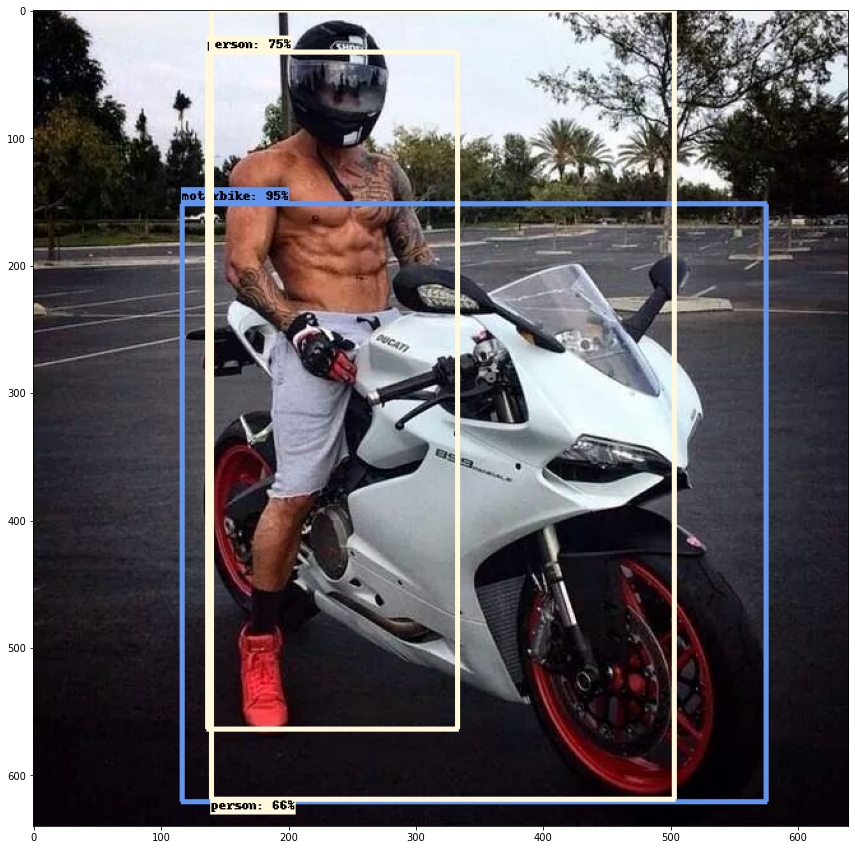

In [ ]:
for image_path in IMAGE_PATHS_SELS:

    print('Running inference for {}... '.format(image_path), end='')

    # image_path = TEST_IMAGE_PATH + image_path
    image_np = load_image_into_numpy_array(image_path)
    
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    print('Done')

plt.show()


이제 나중에 필요한 종속성을 가져올 수 있습니다.

## [옵션]

사용 가능한 객체 감지 모델 중에는 Mask R-CNN이 있으며, 이 모델의 출력은 인스턴스 분할을 허용합니다.

이를 시각화하기 위해 이전에 했던 것과 같은 방법을 사용하지만 다른 매개변수를 추가합니다. `instance_masks=output_dict.get('detection_masks_reframed', None)`


In [ ]:
# Handle models with masks:
image_np_with_mask = image_np.copy()

if 'detection_masks' in result:
  # we need to convert np.arrays to tensors
  detection_masks = tf.convert_to_tensor(result['detection_masks'][0])
  detection_boxes = tf.convert_to_tensor(result['detection_boxes'][0])

  # Reframe the bbox mask to the image size.
  detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes,
              image_np.shape[1], image_np.shape[2])
  detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                      tf.uint8)
  result['detection_masks_reframed'] = detection_masks_reframed.numpy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_mask[0],
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      instance_masks=result.get('detection_masks_reframed', None),
      line_thickness=8)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_mask[0])
plt.show()